In [1]:
import numpy as truenp
import matplotlib.pyplot as plt

import poppy as pp

from prysm import (
    mathops, 
    conf,
)
from prysm.mathops import (
    np,
    fft,
    interpolate,
    ndimage,
)
from prysm.coordinates import (
    make_xy_grid, 
    cart_to_polar,
)

from prysm.geometry import (
    circle,
)
from prysm.propagation import Wavefront as WF

mathops.set_backend_to_cupy()

from tqdm import tqdm

/home/derbyk/miniconda3/envs/py310-stp-env/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


100%|██████████| 100/100 [00:02<00:00, 33.57it/s]


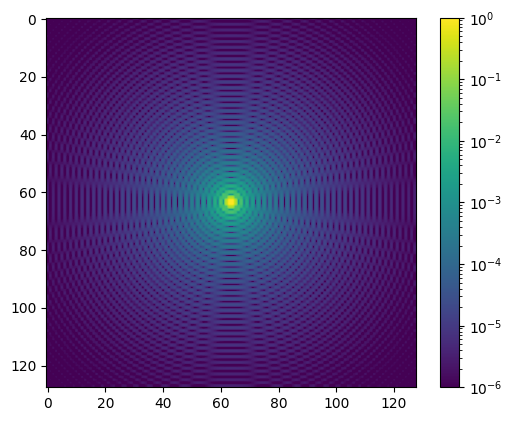

In [2]:
diam = 6.5
wvl = 650e-9
npix = 512

pxscl = truenp.rad2deg(wvl / 6.5) * 3600

inwave = pp.Wavefront(diam=diam, wavelength=wvl, npix=npix, oversample=5)
sys = pp.OpticalSystem()
sys.add_pupil(pp.CircularAperture(radius=diam / 2))
sys.add_detector(pixelscale=pxscl, fov_arcsec=pxscl * 64)

for i in tqdm(np.arange(100)):
    psf = sys.calc_psf(650e-9)

plt.imshow(psf[0].data / psf[0].data.max(), norm='log', vmin=1e-6)
plt.colorbar()

100%|██████████| 1000/1000 [00:00<00:00, 6039.38it/s]


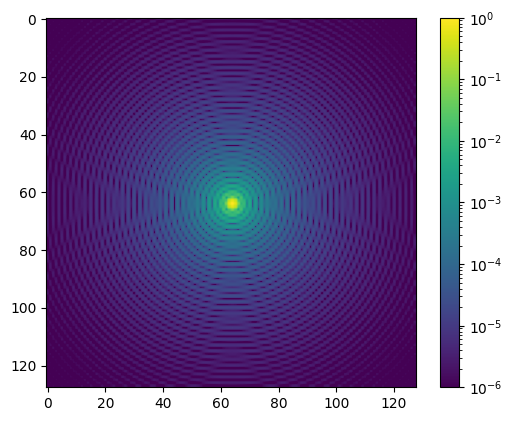

In [3]:
diam = 6500
wvl = 0.65
npix = 1024

pxscl = 650e-9 / 6.5 * 3 * 1e6

x, y = make_xy_grid(npix, diameter=diam)
r, t = cart_to_polar(x, y)

pup = circle(radius=diam / 2, r=r)

wf = WF.from_amp_and_phase(amplitude=pup, phase=None, wavelength=wvl, dx=diam / npix)

for i in tqdm(np.arange(1000)):
    psf = np.abs(wf.focus_fixed_sampling(efl=6500, dx=pxscl, samples=128, shift=(0, 0), method='mdft').data) ** 2

plt.imshow(psf.get() / psf.get().max(), norm='log', vmin=1e-6)
plt.colorbar()